<a href="https://colab.research.google.com/github/Engineer-Ayesha-Shafique/RESNET50-on-Alien-Vs-Predator-dataset/blob/main/Resnet50_in_Pytorch_on_Alien_Vs_Predator_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation on ResNET 50 

Using Kaggle dataset : https://www.kaggle.com/datasets/pmigdal/alien-vs-predator-images

Volume:
train: 347 aliens and 347 predators
validation: 100 aliens and 100 predators



### 1. Import dependencies

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [ ]:
torch.__version__ 

'2.0.0+cu118'

In [ ]:
import torchvision
torchvision.__version__  

'0.15.1+cu118'

In [ ]:
input_path = "input/alien_vs_predator_thumbnails/data/"

In [ ]:
#run in case you get error while creae pytorch data generators
# FileNotFoundError: Found no valid file for the classes .ipynb_checkpoints. 
#Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

#!rm -R input/alien_vs_predator_thumbnails/data/train/.ipynb_checkpoints
#!ls input/alien_vs_predator_thumbnails/data/train/ -a   #to make sure that the deletion has occurred

rm: cannot remove 'input/alien_vs_predator_thumbnails/data/train/.ipynb_checkpoints': No such file or directory
.  ..  alien  predator


In [ ]:
#run in case you get error while creae pytorch data generators
# FileNotFoundError: Found no valid file for the classes .ipynb_checkpoints. 
#Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

#!rm -R input/alien_vs_predator_thumbnails/data/validation/.ipynb_checkpoints
#!ls input/alien_vs_predator_thumbnails/data/validation/ -a   #to make sure that the deletion has occurred

.  ..  alien  predator



### 2. Create PyTorch data generators

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(input_path + 'train', data_transforms['train']),
    #datasets.ImageFolder(input_path + 'train/predator', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(input_path + 'validation', data_transforms['validation'])
}

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=0),  # for Kaggle
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=0)  # for Kaggle
}

### 3. Create the network

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = models.resnet50(pretrained=True).to(device)
    
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

### 4. Train the model

In [ ]:
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':model.train()
            else:model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,epoch_loss, epoch_acc))
    return model

In [ ]:
model_trained = train_model(model, criterion, optimizer, num_epochs=50)

Epoch 1/50
----------
train loss: 0.2575, acc: 0.9006
validation loss: 0.3495, acc: 0.8700
Epoch 2/50
----------
train loss: 0.2171, acc: 0.9092
validation loss: 0.3246, acc: 0.8750
Epoch 3/50
----------
train loss: 0.2562, acc: 0.8934
validation loss: 0.3419, acc: 0.8700
Epoch 4/50
----------
train loss: 0.3004, acc: 0.8833
validation loss: 0.3339, acc: 0.8650
Epoch 5/50
----------
train loss: 0.2477, acc: 0.9049
validation loss: 0.3174, acc: 0.8800
Epoch 6/50
----------
train loss: 0.2542, acc: 0.9035
validation loss: 0.2922, acc: 0.8850
Epoch 7/50
----------
train loss: 0.2347, acc: 0.8847
validation loss: 0.3176, acc: 0.8750
Epoch 8/50
----------
train loss: 0.2456, acc: 0.8876
validation loss: 0.3358, acc: 0.8650
Epoch 9/50
----------
train loss: 0.2503, acc: 0.8847
validation loss: 0.3084, acc: 0.8750
Epoch 10/50
----------
train loss: 0.2754, acc: 0.8876
validation loss: 0.2936, acc: 0.8850
Epoch 11/50
----------
train loss: 0.2538, acc: 0.8948
validation loss: 0.3079, acc: 0.87

### 5. Save and load the model

In [ ]:
#Run only first time
#!mkdir models
#!mkdir models/pytorch

In [ ]:
torch.save(model_trained.state_dict(), 'models/pytorch/resnet50.h5')

In [ ]:
model = models.resnet50(pretrained=False).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)
model.load_state_dict(torch.load('models/pytorch/resnet50.h5'))

<All keys matched successfully>

### 6. Make predictions on sample test images

In [ ]:
validation_img_paths = ["validation/alien/77.jpg",
                        "validation/predator/35.jpg",
                        "validation/predator/33.jpg"]
img_list = [Image.open(input_path + img_path) for img_path in validation_img_paths]

validation_batch = torch.stack([data_transforms['validation'](img).to(device)
                                for img in img_list])

pred_logits_tensor = model(validation_batch)
pred_logits_tensor



tensor([[ 1.0327, -1.5522],
        [-2.6189,  2.0725],
        [-3.4172,  2.7047]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
pred_probs

array([[0.92988265, 0.07011737],
       [0.00909018, 0.9909099 ],
       [0.0021895 , 0.99781054]], dtype=float32)

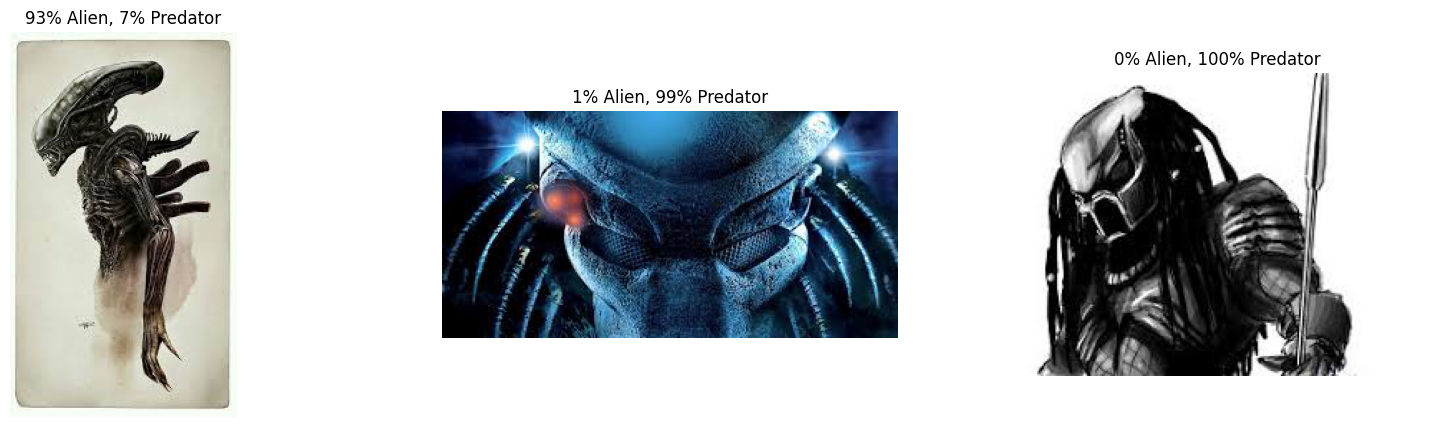

In [ ]:
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Alien, {:.0f}% Predator".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)